In [ ]:
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from PIL import Image
import tensorflow as tf
import keras
#import dask.dataframe as dd
import os
import pydicom as dicom
import matplotlib.pylab as plt

In [ ]:
!gcloud init

In [ ]:
!pip3 install --no-cache-dir -U crcmod

# Dataset 1

In [ ]:
%cd disk2/

In [ ]:
%pwd

'/content/disk2'

In [ ]:
!gsutil cp gs://adv-tdl-data-bucket/Dataset.zip ../

Copying gs://adv-tdl-data-bucket/Dataset.zip...
| [1 files][ 20.9 GiB/ 20.9 GiB]   48.8 MiB/s                                   
Operation completed over 1 objects/20.9 GiB.                                     


In [ ]:
import zipfile
with zipfile.ZipFile('../Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

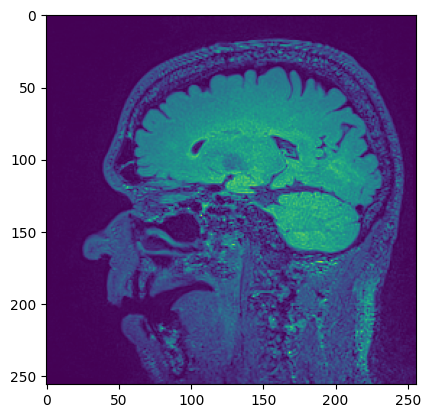

In [ ]:
path = '/content/PPMI/100001/3D_T2_FLAIR/2020-10-07_13_51_32.0/I1473191/PPMI_100001_MR_3D_T2_FLAIR__br_raw_20210723152845317_80_S1047641_I1473191.dcm'

ds = dicom.dcmread(path)

plt.imshow(ds.pixel_array)

# Dataset 2

**Note**: disk2 is the additional disk - it has 200 GB of storage

In [ ]:
!gsutil cp gs://adv-tdl-data-bucket/Dataset1.zip .

Copying gs://adv-tdl-data-bucket/Dataset1.zip...
Resuming download for ./Dataset1.zip component 0
Resuming download for ./Dataset1.zip component 1
Resuming download for ./Dataset1.zip component 2
Resuming download for ./Dataset1.zip component 3
| [1 files][ 24.1 GiB/ 24.1 GiB]   76.1 MiB/s                                   
Operation completed over 1 objects/24.1 GiB.                                     


In [ ]:
import zipfile
with zipfile.ZipFile('Dataset1.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

# Mounting Disk 2

In [3]:
!sudo mount /dev/sdb1 /content/disk2/

In [ ]:
# Linux Commands Used
# %pwd
# %cd /content/
# %ls
# !lsblk
# !sudo mount /dev/sdb1 /content/disk2/
# !sudo lsof /dev/sdb1
# !sudo umount /dev/sdb1

In [4]:
X = np.load('/content/silvia_cache/X.npy')
y = np.load('/content/silvia_cache/y.npy')

In [5]:
#Pd = 0, Prodromal = 1, Control = 2
label_dict = {0 : "Parkinson's Disease", 1: "Prodromal", 2: "Control"}

In [ ]:
cnt_0 = 0
cnt_1 = 0
cnt_2 = 0
for i in range(len(y)):
  label=y[i]
  if label==0:
    cnt_0+=1
  if label==1:
    cnt_1+=1
  if label==2:
    cnt_2+=1
  if label==0 and cnt_0<=3:
    pixels = X[i]
    print('Label: ', label)
    print('Index: ',i)
  if label==1 and cnt_1<=3:
    pixels = X[i]
    print('Label: ', label)
    print('Index: ',i)
  if label==2 and cnt_2<=3:
    pixels = X[i]
    print('Label: ', label)
    print('Index: ',i)
  if cnt_0==3 and cnt_1==3 and cnt_2==3:
    break


Label:  0
Index:  0
Label:  0
Index:  1
Label:  0
Index:  2
Label:  2
Index:  704
Label:  2
Index:  705
Label:  2
Index:  706
Label:  1
Index:  1056
Label:  1
Index:  1057
Label:  1
Index:  1058


Control


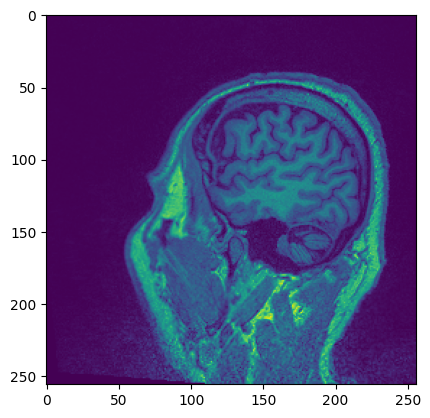

In [ ]:
print(label_dict[y[963]])
plt.imshow(X[963])

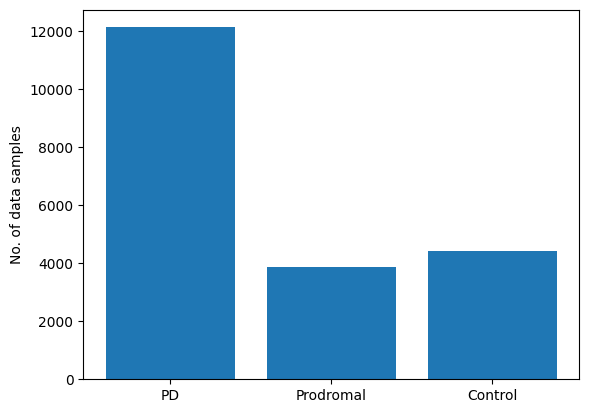

In [11]:
cnt_0, cnt_1, cnt_2 = 0, 0, 0
for i in y:
  if i==0:
    cnt_0+=1
  if i==1:
    cnt_1+=1
  if i==2:
    cnt_2+=1
counts = [cnt_0, cnt_1, cnt_2]
values = ['PD', "Prodromal", 'Control']


plt.bar(values, counts)
plt.ylabel("No. of data samples")
plt.xticks(values)
plt.show()

In [10]:
len(y)

20416